In [71]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("dropout-ratio-2012-2015.csv")

# Exploring the dataset
print(df.head())
print(df.info())
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

#using np.nan
df.replace("NR", np.nan, inplace=True)


# Renaming the columns
df.rename(columns={"Primary_Total": "Primary", "Upper Primary_Total": "Upper_Primary", "Secondary _Total": "Secondary", "HrSecondary_Total": "HrSecondary"}, inplace=True)

# Converting the object datatype to float
df["Primary"] = df["Primary"].astype(float)
df["Upper_Primary"] = df["Upper_Primary"].astype(float)
df["Secondary"] = df["Secondary"].astype(float)
df["HrSecondary"] = df["HrSecondary"].astype(float)



# Checking for missing values
print(df.isnull().sum())



         State_UT     year Primary_Boys Primary_Girls Primary_Total  \
0   A & N Islands  2012-13         0.83          0.51          0.68   
1   A & N Islands  2013-14         1.35          1.06          1.21   
2   A & N Islands  2014-15         0.47          0.55          0.51   
3  Andhra Pradesh  2012-13          3.3          3.05          3.18   
4  Andhra Pradesh  2013-14         4.31          4.39          4.35   

  Upper Primary_Boys Upper Primary_Girls Upper Primary_Total Secondary _Boys  \
0     Uppe_r_Primary                1.09                1.23            5.57   
1                 NR                1.54                0.51            8.36   
2               1.44                1.95                1.69           11.47   
3               3.21                3.51                3.36           12.21   
4               3.46                4.12                3.78           11.95   

  Secondary _Girls Secondary _Total HrSecondary_Boys HrSecondary_Girls  \
0             5.55

In [72]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [35]:
df_total=df[['Primary','Upper_Primary','Secondary','HrSecondary']]

In [36]:
df_total.head()

,Primary,Upper_Primary,Secondary,HrSecondary
0,0.68,1.23,5.56,14.14
1,1.21,0.51,7.20,15.87
2,0.51,1.69,9.87,16.93
3,3.18,3.36,12.72,0.35
4,4.35,3.78,12.65,11.79


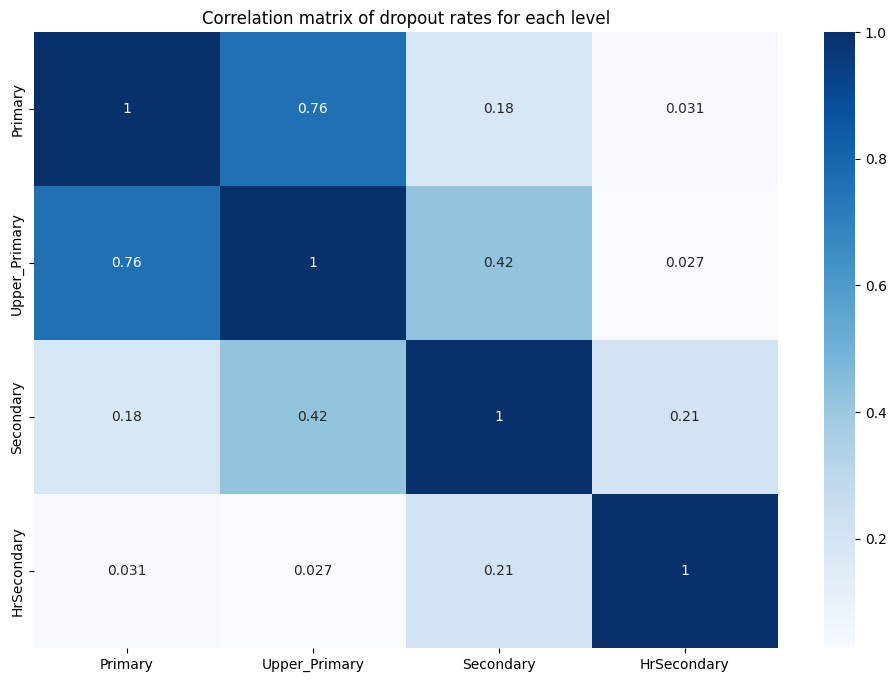

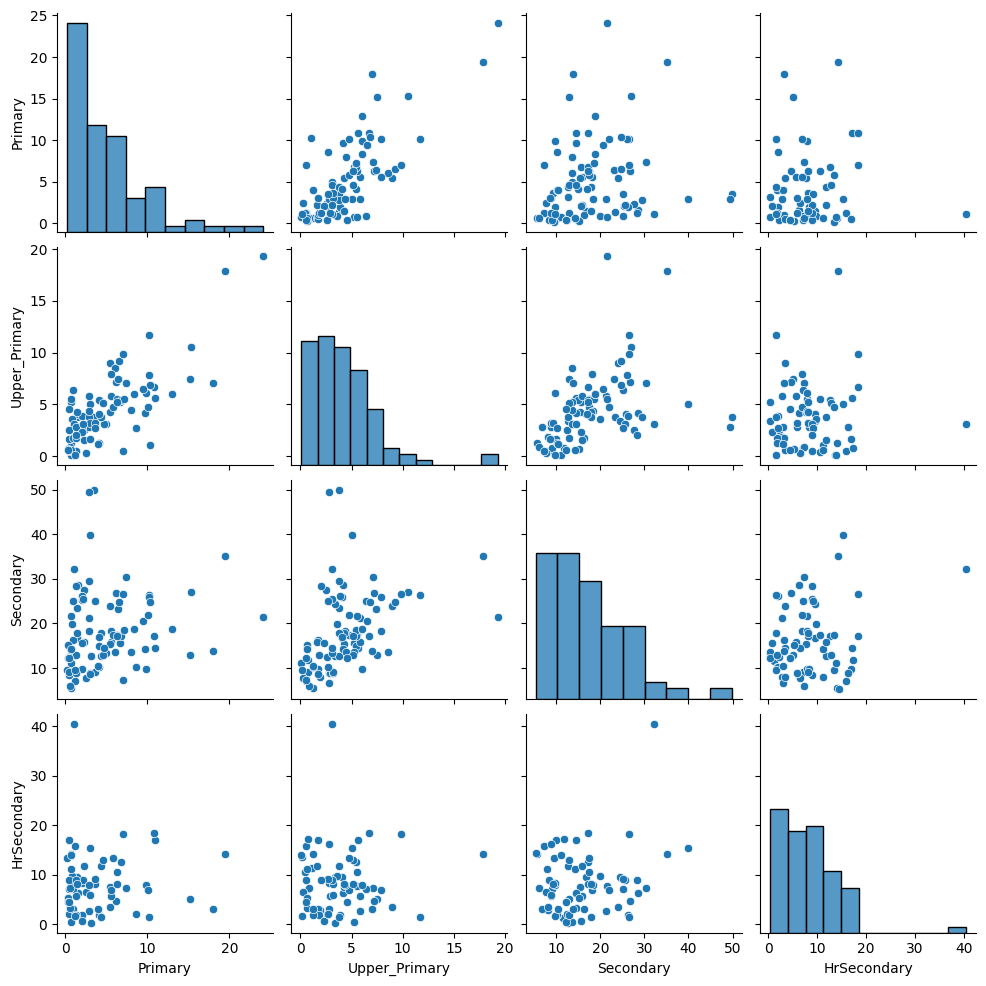

In [37]:
# Plotting the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_total.corr(), annot=True, cmap="Blues",)
plt.title("Correlation matrix of dropout rates for each level")
plt.show()

# Plotting the pairplot
sns.pairplot(df_total)
plt.show()

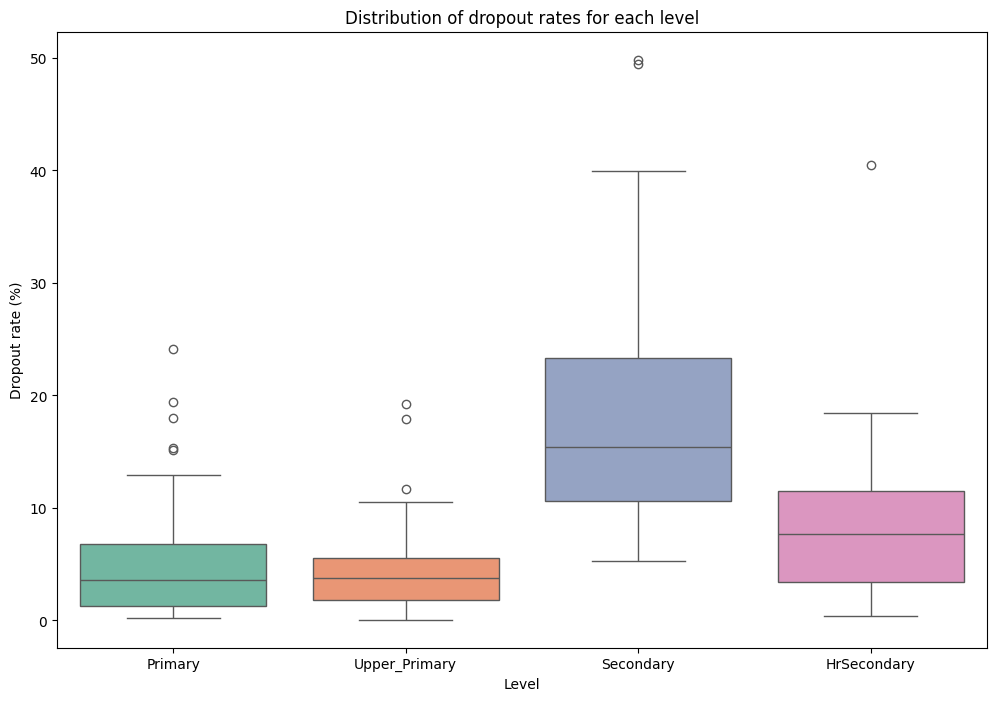

In [38]:
# Plotting the distribution of dropout rates for each level
plt.figure(figsize=(12,8))
sns.boxplot(data=df_total, palette="Set2")
plt.title("Distribution of dropout rates for each level")
plt.xlabel("Level")
plt.ylabel("Dropout rate (%)")
plt.show()

In [93]:
# Adding a new column for the average dropout rate across all levels
df["Average"] = df_total.mean(axis=1)


In [94]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [41]:
# Sort the dataframe by the average dropout rate in ascending order
df_sorted = df.sort_values(by="Average", ascending=True)
# Select the first five rows for the best states
df_best5 = df_sorted.head(5)
# Select the last five rows for the worst states
df_worst5 = df_sorted.tail(5)
# Concatenate the best and worst states into a new dataframe
df_comparison = pd.concat([df_best5, df_worst5])


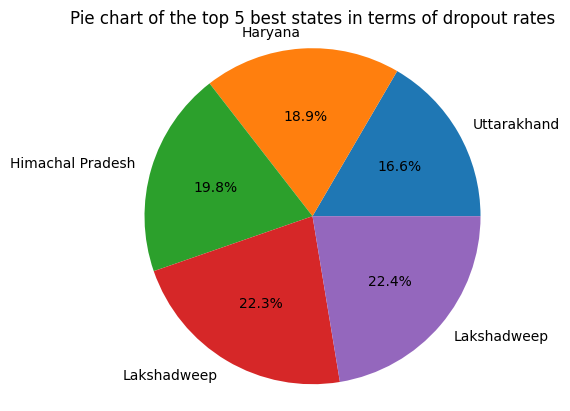

In [42]:
# Extract the data and labels for the pie chart
data = df_best5["Average"]
labels = df_best5["State_UT"]
# Create the pie chart using the plt.pie() function
plt.pie(data, labels=labels, autopct="%1.1f%%")
# Add a title for the pie chart
plt.title("Pie chart of the top 5 best states in terms of dropout rates")
# Adjust the aspect ratio of the plot
plt.axis("equal")
# Show the pie chart on the screen or save it to a file
plt.show()

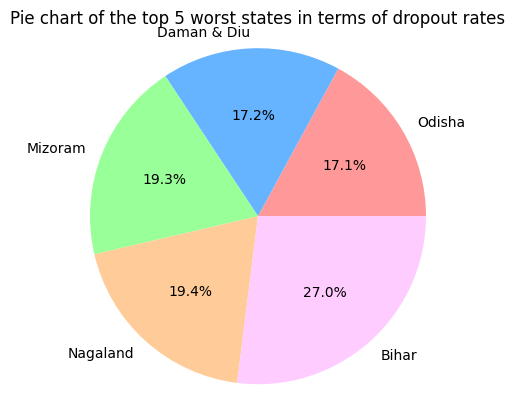

In [43]:
# Extract the data and labels for the pie chart
data = df_worst5["Average"]
labels = df_worst5["State_UT"]
# Create the pie chart using the plt.pie() function
plt.pie(data, labels=labels,autopct="%1.1f%%",colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffccff'] )
# Add a title for the pie chart
plt.title("Pie chart of the top 5 worst states in terms of dropout rates")
# Adjust the aspect ratio of the plot
plt.axis("equal")
# Show the pie chart on the screen or save it to a file
plt.show()

In [96]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [45]:
df_boys=df[["Primary_Boys","Upper Primary_Boys","Secondary _Boys","HrSecondary_Boys"]]
df_girls=df[["Primary_Girls","Upper Primary_Girls","Secondary _Girls","HrSecondary_Girls"]]

In [46]:
df_boys = df_boys.apply(pd.to_numeric, errors='coerce')
df_girls=df_girls.apply(pd.to_numeric, errors='coerce')


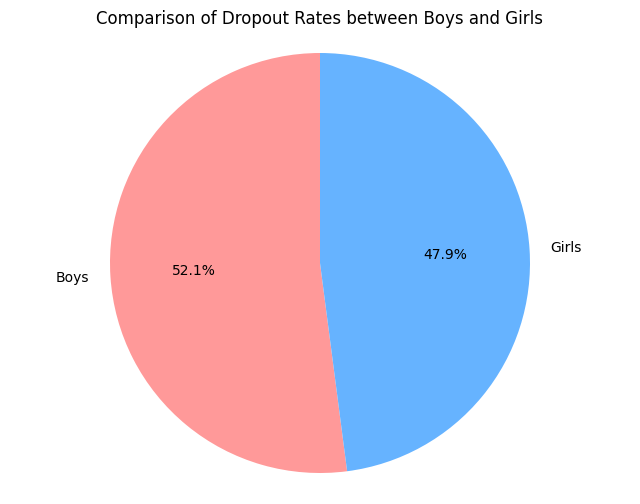

In [47]:
# Calculate the total dropout rates for boys and girls
boys_total = df_boys.sum().sum()
girls_total = df_girls.sum().sum()

# Calculate the percentage of dropout rates for boys and girls
boys_percentage = (boys_total / (boys_total + girls_total)) * 100
girls_percentage = (girls_total / (boys_total + girls_total)) * 100

# Create a pie chart to visualize the comparison
labels = ['Boys', 'Girls']
sizes = [boys_percentage, girls_percentage]
colors = ['#ff9999', '#66b3ff']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Comparison of Dropout Rates between Boys and Girls')
plt.show()


In [51]:
# Convert columns to numeric data types
df["year"] = pd.to_numeric(df["year"], errors="coerce")

In [52]:
# Group the dataframe by year and calculate the mean dropout rate for each level
df_grouped = df.groupby("year").mean().reset_index()


In [97]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [78]:
# Select the relevant columns for comparison
comparison_data = df[['year', 'Primary', 'Upper_Primary', 'Secondary','HrSecondary']]

# Group the data by Year and calculate the average GER for each year
year_avg_GER = comparison_data.groupby('year').mean()

# Sort the data by Year in ascending order
year_avg_GER = year_avg_GER.sort_values('year')

In [79]:
year_avg_GER.head()

,Primary,Upper_Primary,Secondary,HrSecondary
year,,,,
2012-13,5.354138,4.277742,16.602353,7.839583
2013-14,4.919394,4.284000,18.240556,8.573333
2014-15,4.480323,3.992571,17.294722,8.420714


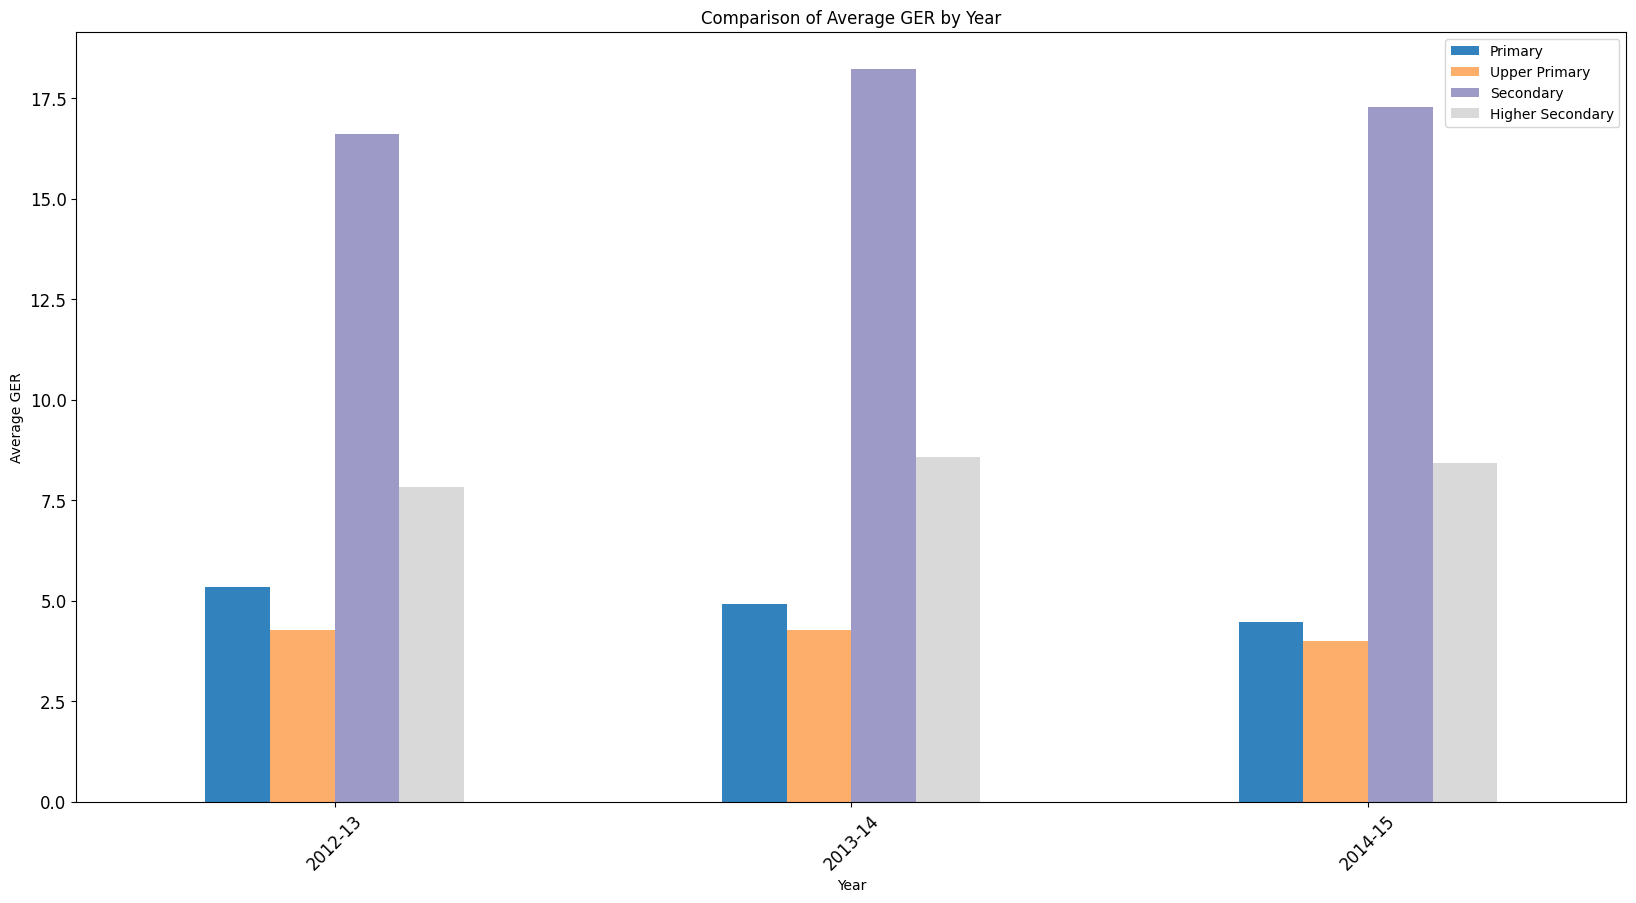

In [84]:
# Plot the bar chart
year_avg_GER.plot(kind='bar', figsize=(20, 10), rot=45, fontsize=12, colormap='tab20c')
plt.xlabel('Year')
plt.ylabel('Average GER')
plt.title('Comparison of Average GER by Year')
plt.legend(['Primary', 'Upper Primary', 'Secondary', 'Higher Secondary'])
plt.xticks(rotation=45)
plt.show()



In [86]:
import geopandas as gpd

# Load the geojson file into a GeoDataFrame
india = gpd.read_file("Indian_States.txt")

In [87]:
india.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [110]:
# Merge the two DataFrames on the common column that contains the state names
merged = pd.merge(india, df, left_on="NAME_1", right_on="State_UT", how="inner")

In [111]:
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary,Upper Primary_Boys,Upper Primary_Girls,Upper_Primary,Secondary _Boys,Secondary _Girls,Secondary,HrSecondary_Boys,HrSecondary_Girls,HrSecondary,Average
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,5.4025
1,A & N Islands,2013-14,1.35,1.06,1.21,NaN,1.54,0.51,8.36,5.98,7.20,18.94,12.2,15.87,6.1975
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,7.2500
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NaN,0.35,4.9025
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,8.1425


In [129]:
# Remove Chandigarh from the GeoDataFrame
merged =merged[merged['NAME_1'] != 'Chandigarh']

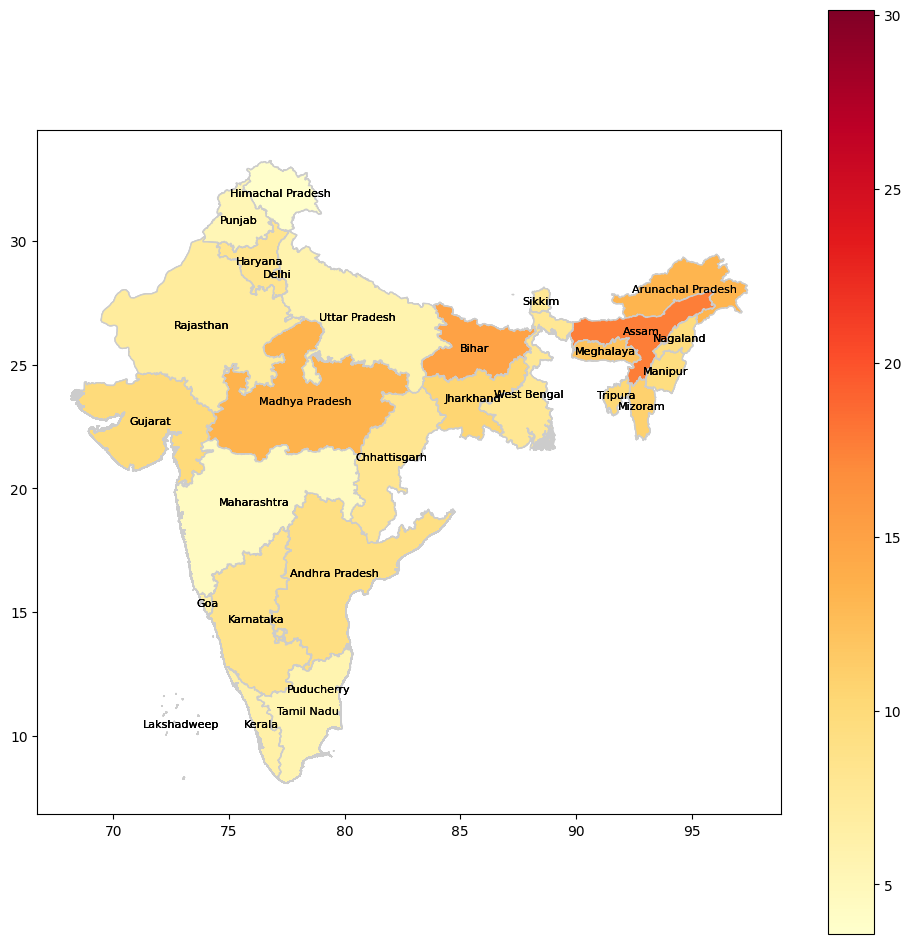

In [130]:

fig, ax = plt.subplots(1, 1, figsize=(12, 12))  # Increase the figsize to increase the size of the map
merged.plot(column='Average', cmap='YlOrRd', linewidth=1, ax=ax, edgecolor='0.8', legend=True)

# Annotate each state with its name at the center
for idx, row in merged.iterrows():
    centroid_x, centroid_y = row['geometry'].centroid.x, row['geometry'].centroid.y
    state_name = row['NAME_1']
    ax.text(centroid_x, centroid_y, state_name, fontsize=8, ha='center', va='center')

